# Experiment result:



|  | 0 | 11 | 25 | 44 | 100 |
|-------------------|--------|--------|---------|-----|-------|
| pre-trained |0.7025 | 0.5867 | 0.4272 | 0.2589 | 0.0385 | 
| fine_tune_0    |0.9395 | 0.8990 | 0.8261 | 0.7079 | 0.2460 | 
| fine_tune_11   |0.9340 | 0.9158 | 0.8755 | 0.7874 | 0.2855 | 
| fine_tune_25   |0.9305 | 0.9142 | 0.8845 | 0.8245 | 0.3335 | 
| fine_tune_44   |0.9240 | 0.9063 | 0.8786 | 0.8357 | 0.3775 | 
| fine_tune_all   |0.9335 | 0.9146 | 0.8838 | 0.8296 | 0.4460 | 

"\nfor aa in accuracies:\n    for x in aa:\n        sys.stdout.write('{:.4f} | '.format(x))\n    sys.stdout.write('\n')\n"

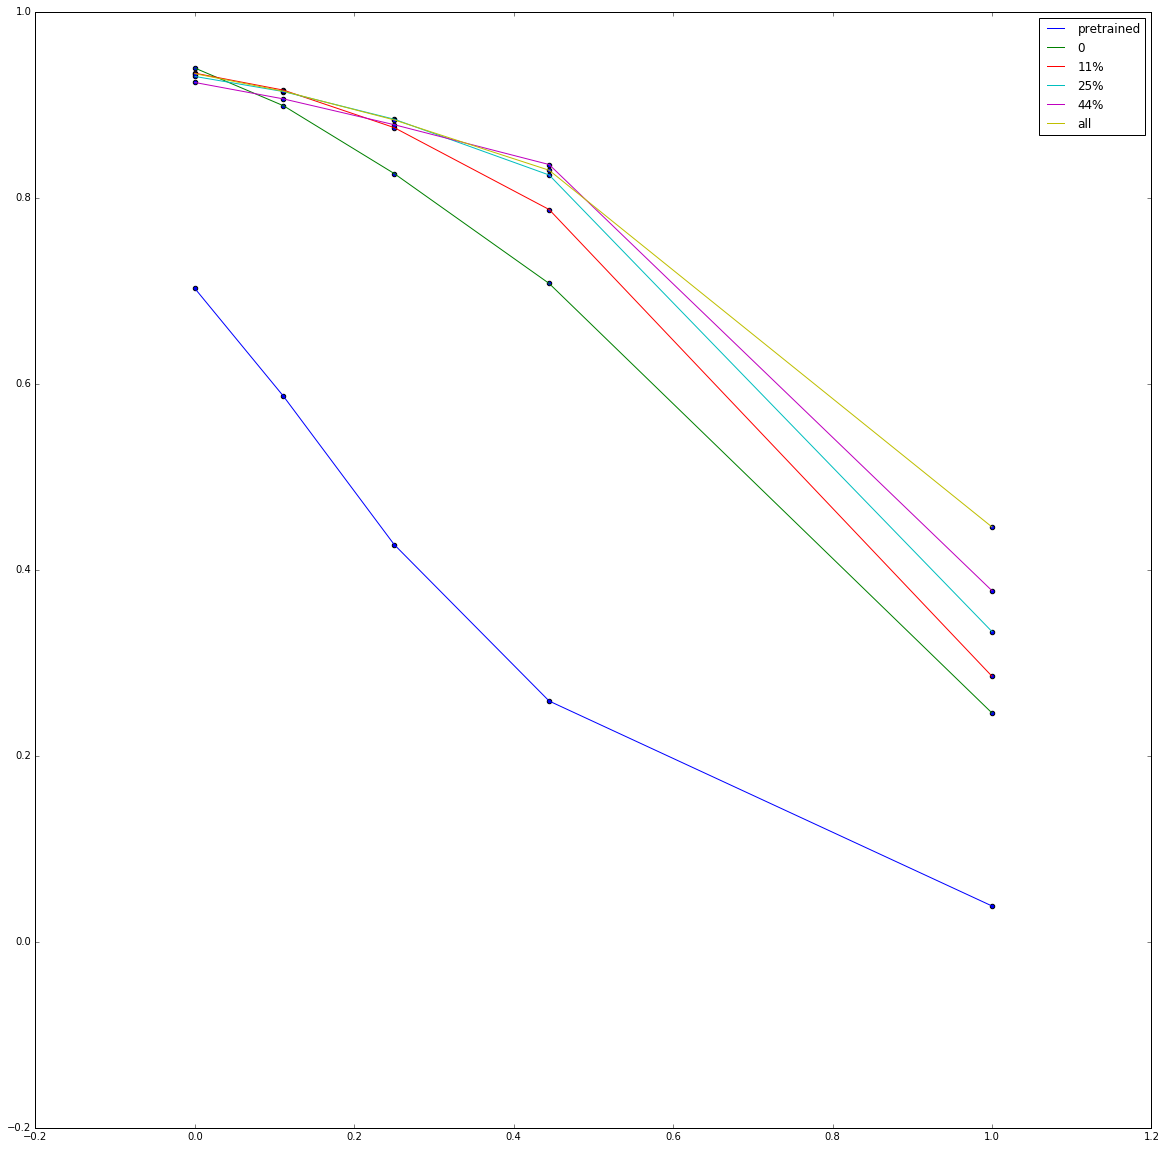

In [21]:
# Result visualization.
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle
%matplotlib inline

imagenet_root = '/home/haow3/occlusion-project/data/imagenet/'
caffe_root = '/home/haow3/software/caffe-rc3/'

plt.rcParams['figure.figsize'] = (20, 20)

accuracies = []

# pre-trained alexnet
positive_true = [1405, 10560, 7689, 2071, 77]
image_sum = [2000, 18000, 18000, 8000, 2000]
accuracy = [0.7025, 0.5866666666666667, 0.42716666666666664, 0.258875, 0.0385]
accuracies.append(accuracy)

# 0
positive_true = [1879, 16182, 14870, 5663, 492]
image_sum = [2000, 18000, 18000, 8000, 2000]
accuracy = [0.9395, 0.899, 0.8261111111111111, 0.707875, 0.246]
accuracies.append(accuracy)

# 11
positive_true = [1868, 16484, 15759, 6299, 571]
image_sum = [2000, 18000, 18000, 8000, 2000]
accuracy = [0.934, 0.9157777777777778, 0.8755, 0.787375, 0.2855]
accuracies.append(accuracy)

# 25
positive_true = [1861, 16456, 15921, 6596, 667]
image_sum = [2000, 18000, 18000, 8000, 2000]
accuracy = [0.9305, 0.9142222222222223, 0.8845, 0.8245, 0.3335]
accuracies.append(accuracy)

# 44
positive_true = [1848, 16314, 15815, 6686, 755]
image_sum = [2000, 18000, 18000, 8000, 2000]
accuracy = [0.924, 0.9063333333333333, 0.8786111111111111, 0.83575, 0.3775]
accuracies.append(accuracy)

# all
positive_true = [1867, 16463, 15908, 6637, 892]
image_sum = [2000, 18000, 18000, 8000, 2000]
accuracy = [0.9335, 0.9146111111111112, 0.8837777777777778, 0.829625, 0.446]
accuracies.append(accuracy)

x = [0, 1.0/3, 1.0/2, 2.0/3, 1]
xx = [t * t for t in x]

for acc in accuracies:
    plt.plot(xx, acc)
    plt.scatter(xx, acc)
plt.legend(['pretrained', '0', '11%', '25%', '44%', 'all'], loc='upper right')

'''
for aa in accuracies:
    for x in aa:
        sys.stdout.write('{:.4f} | '.format(x))
    sys.stdout.write('\n')
'''

finetune_alexnet_all


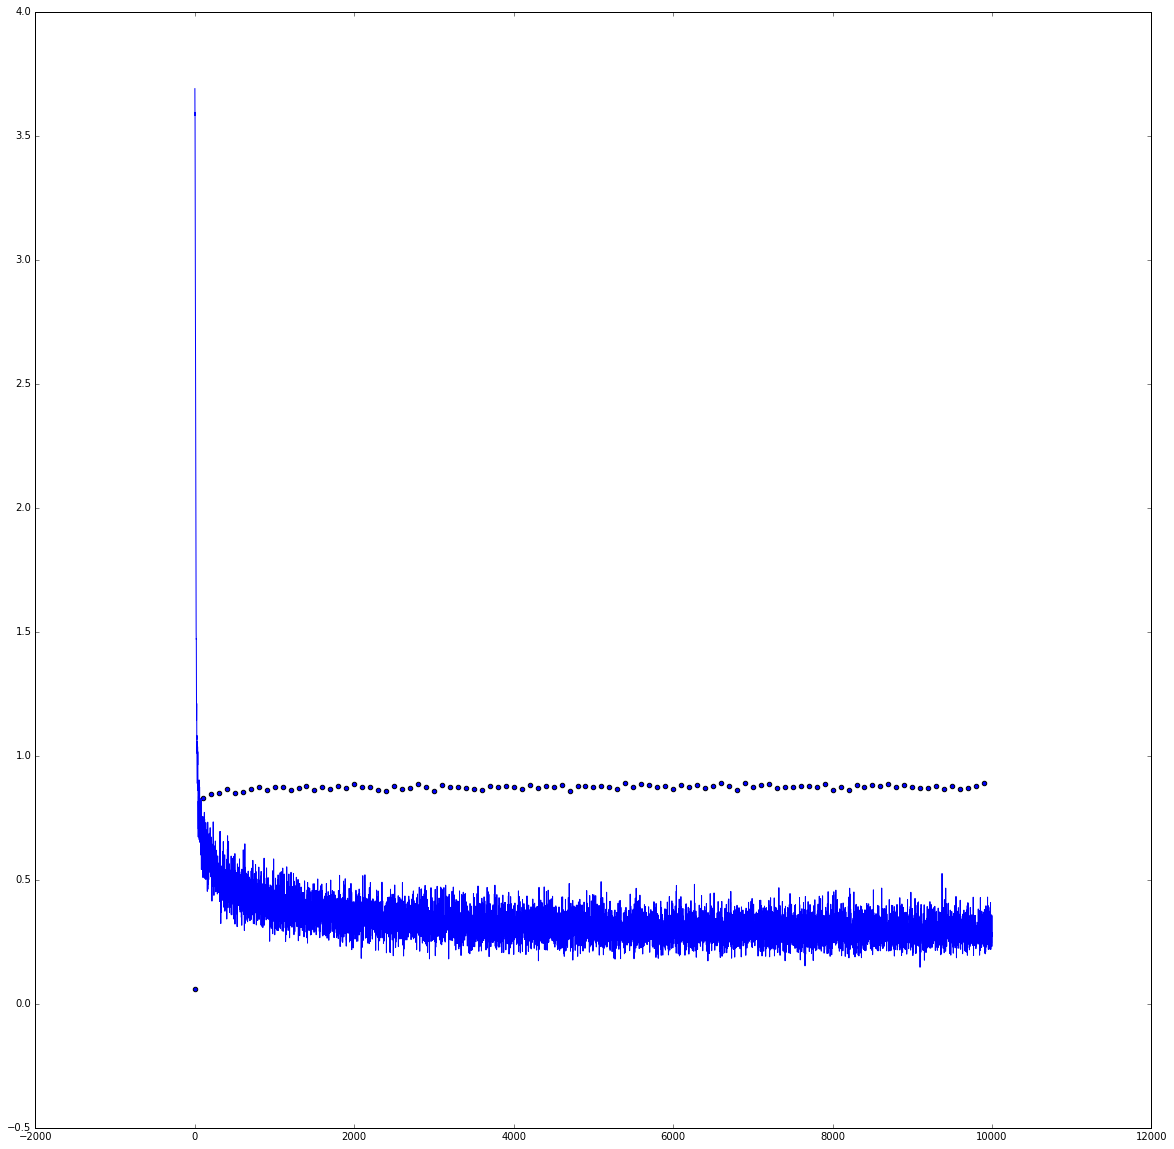

finetune_alexnet_0


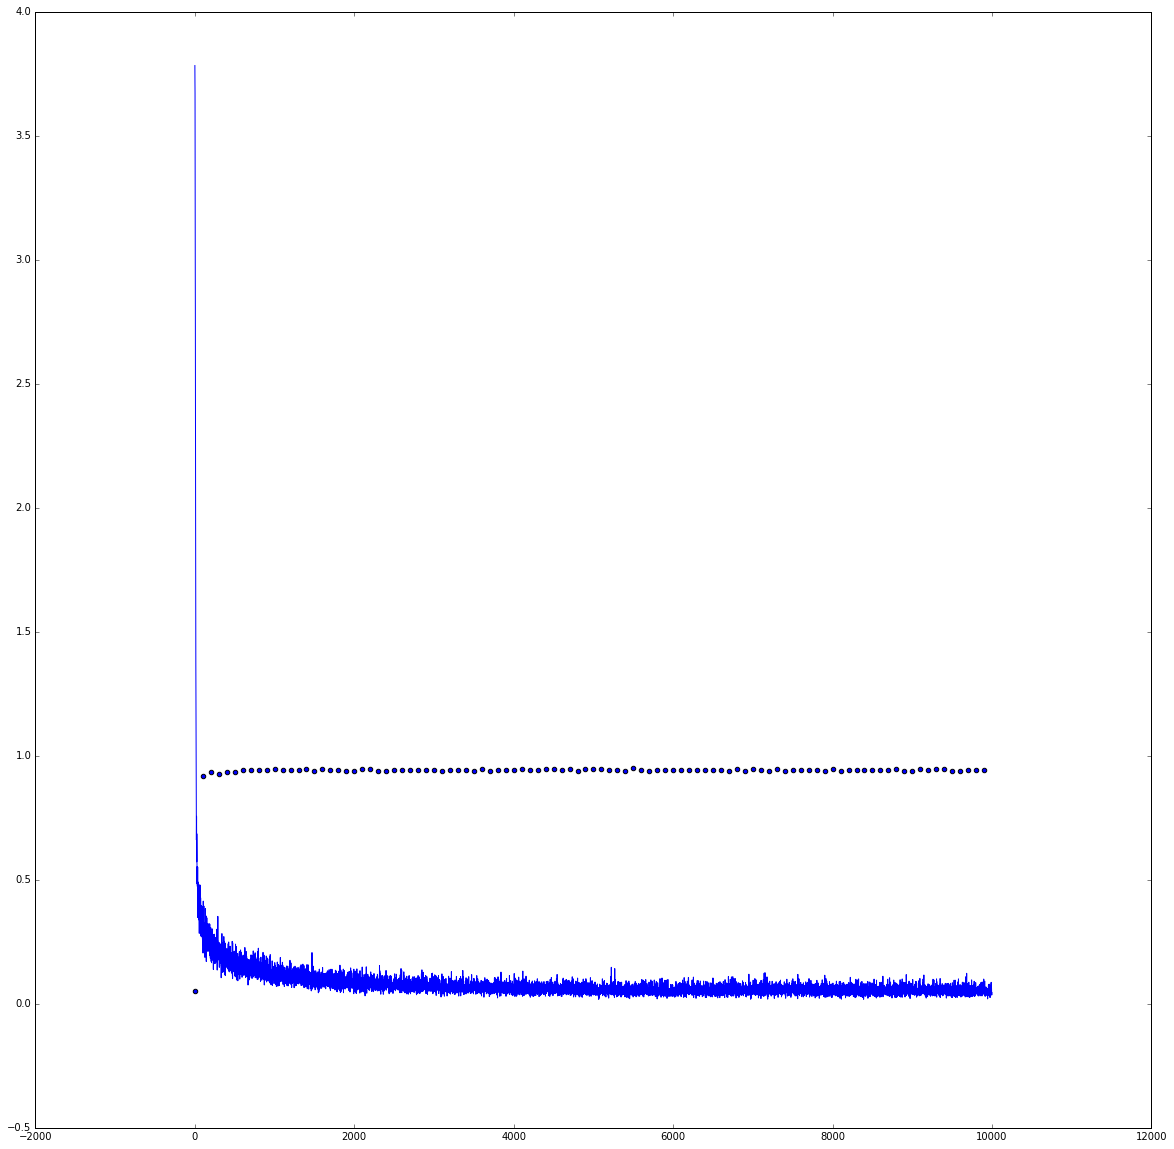

finetune_alexnet_11


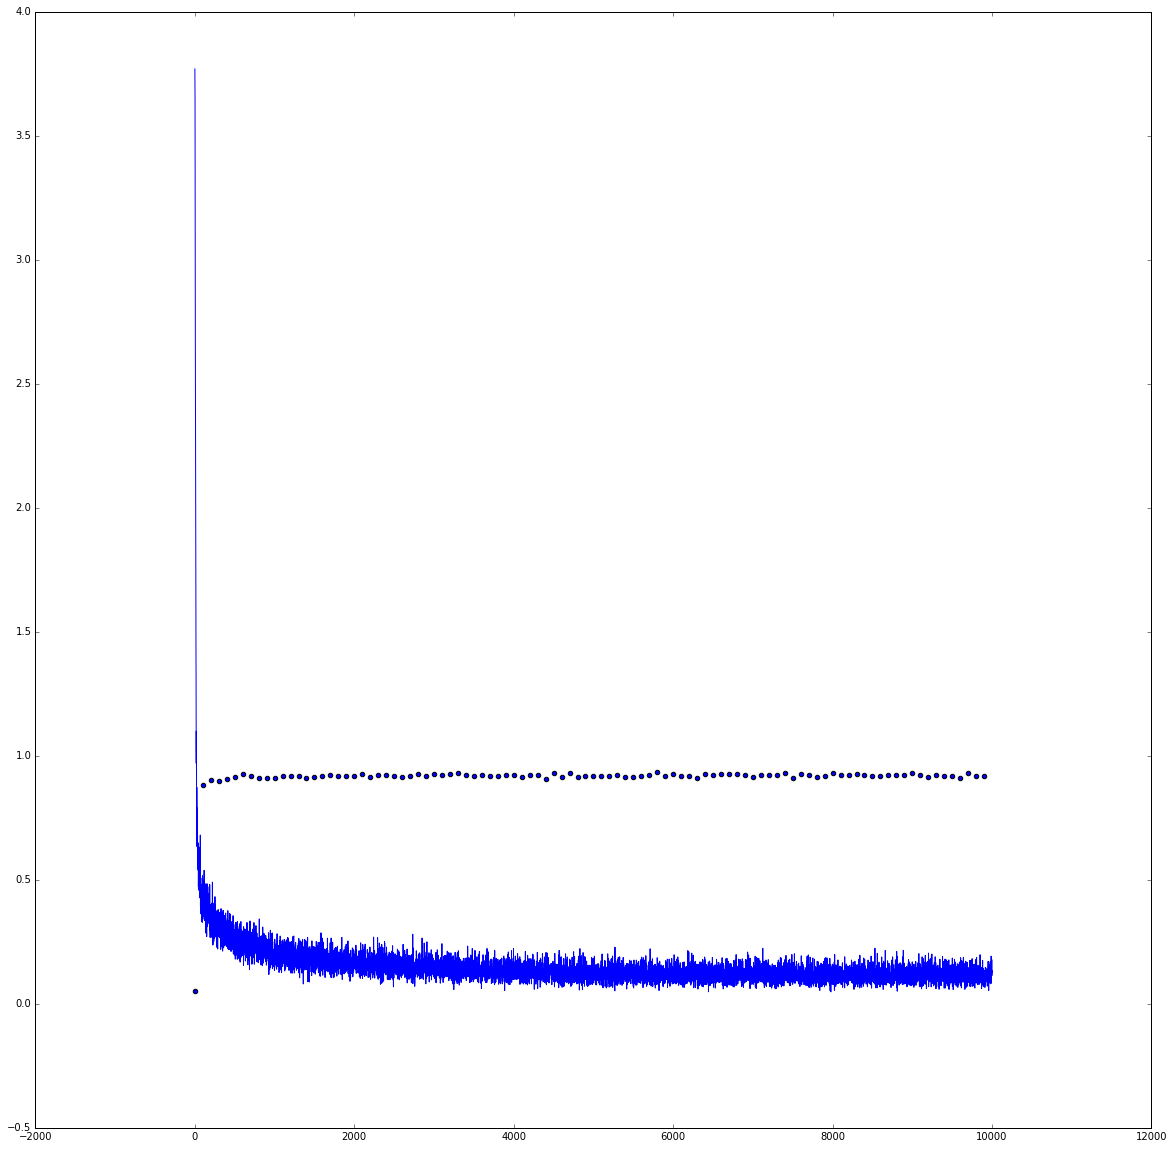

finetune_alexnet_25


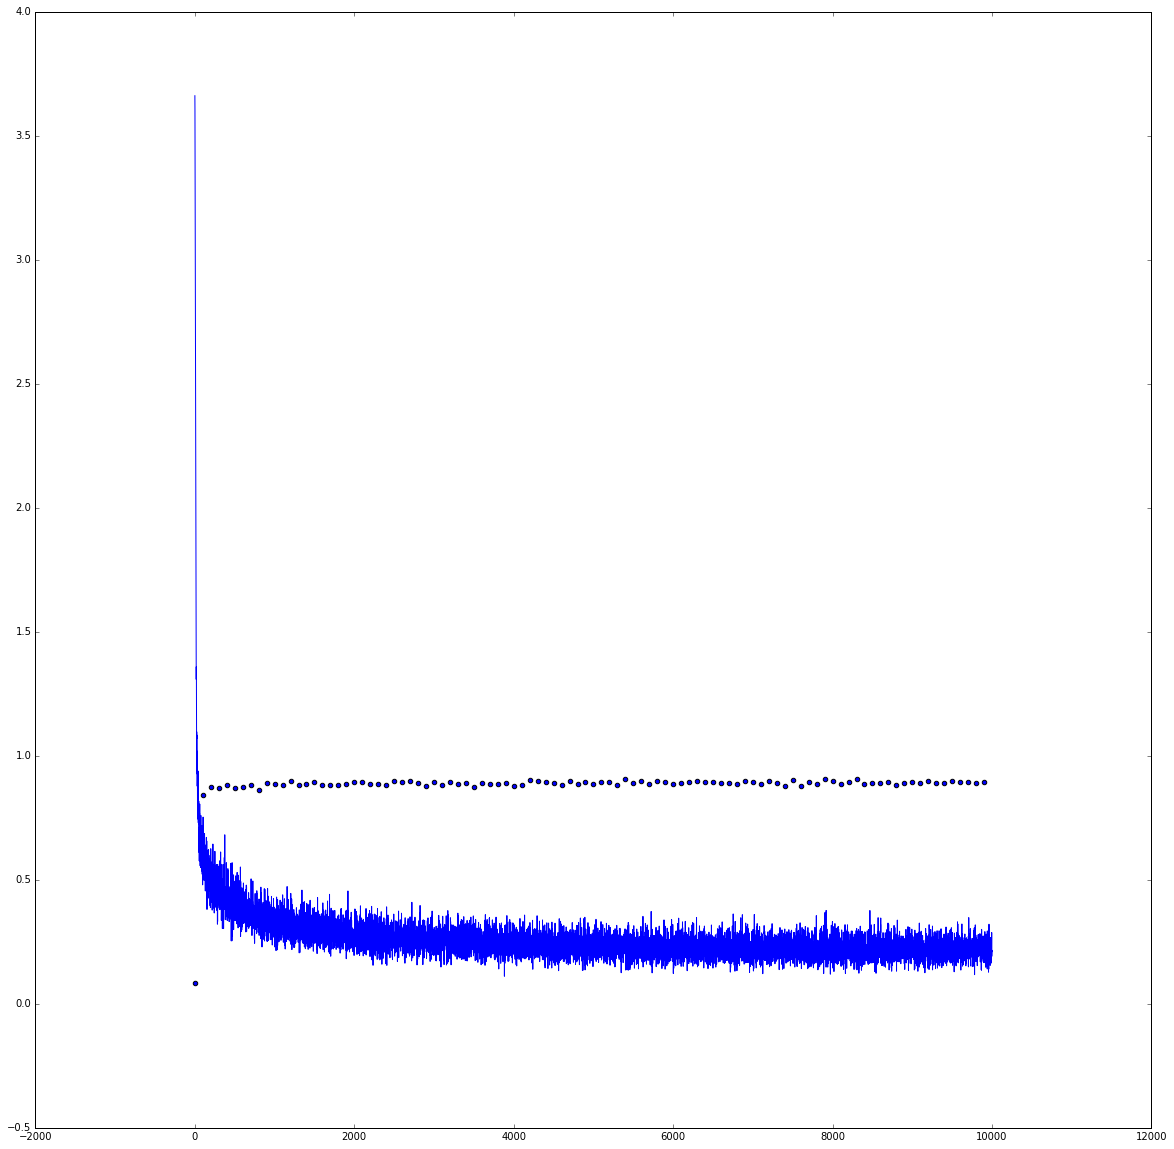

finetune_alexnet_44


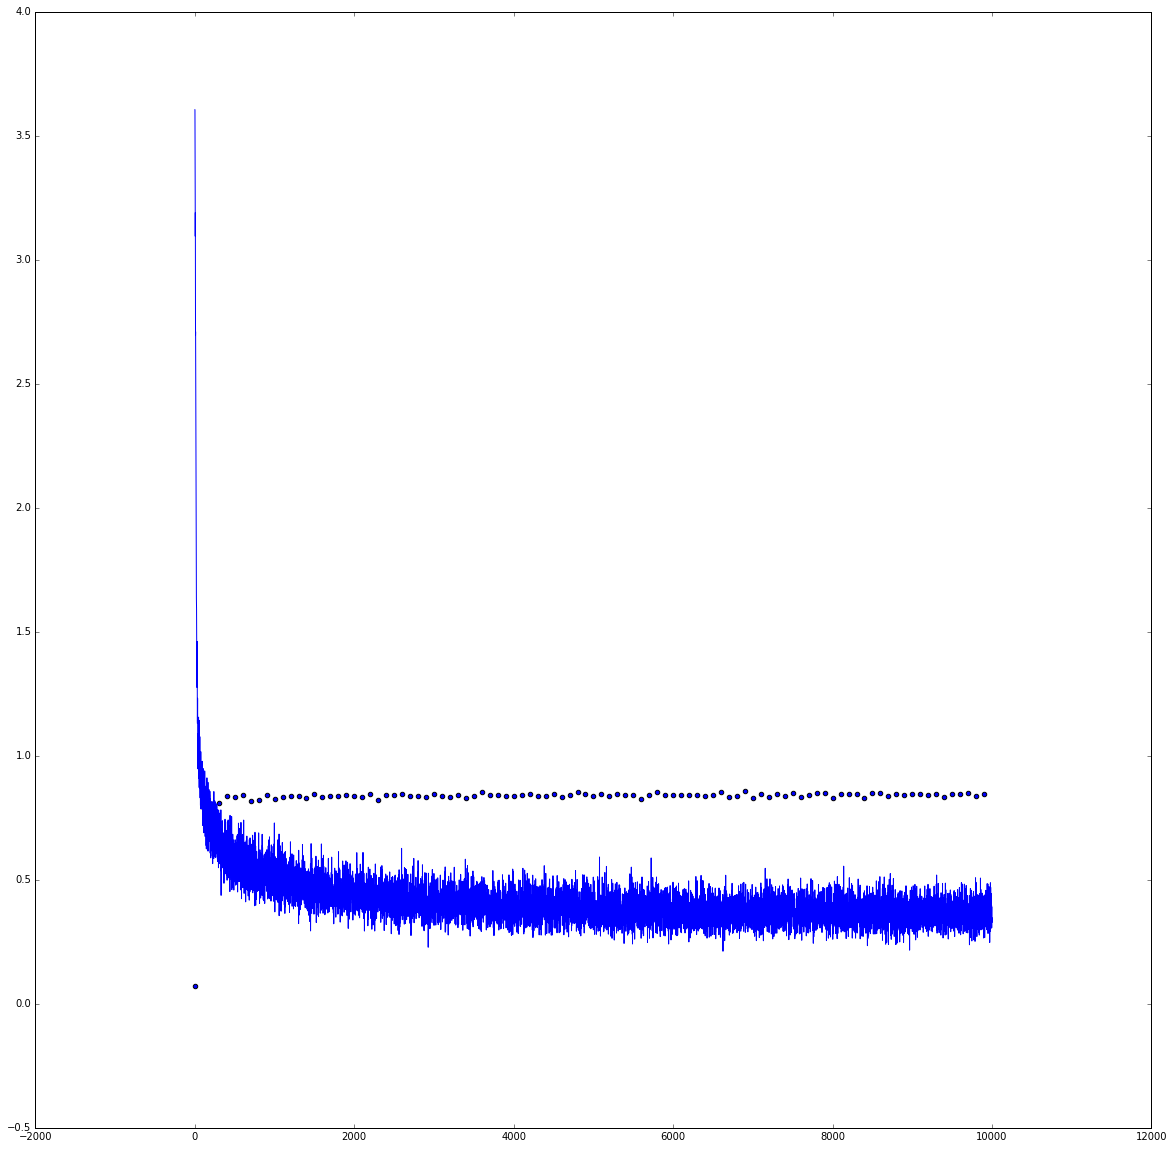

In [33]:
for model_folder in os.listdir(imagenet_root + 'model/'):
    if model_folder.find('finetune_alexnet') == -1:
        continue
    with open('{}model/{}/train_loss.pickle'.format(imagenet_root, model_folder)) as f:
        train_loss = cPickle.load(f)
    with open('{}model/{}/test_accuracy.pickle'.format(imagenet_root, model_folder)) as f:
        test_accuracy = cPickle.load(f)
    print model_folder
    plt.plot(train_loss)
    plt.scatter(test_accuracy.keys(), test_accuracy.values())
    plt.show()
    